# Proyecto práctico: árbol de decisión y random forest con scikit-learn

In [1]:
#Importamos las librerias principales
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

Utilizaremos el **Car Evaluation Data Set** de Kaggle: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

In [ ]:
#Cargamos dataset a utilizar ( recuerda poner el relative path)
df_car = pd.read_csv("Datasets\car_evaluation.csv", header=None)

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\AlexisBenitez\AppData\Local\Temp\ipykernel_21888\720216111.py:2: SyntaxWarning: invalid escape sequence '\c'
  df_car = pd.read_csv("Datasets\car_evaluation.csv", header=None)


### Analisis exploratorio

In [4]:
# Visulizacion del dataframe
df_car.head(10)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [5]:
# Analizamos el shape del objeto
df_car.shape

(1728, 7)

In [6]:
# Vamos a renombrar las columnas de manera correcta
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df_car.columns = col_names

In [7]:
# Verficamos la transformacion realizada
df_car.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [8]:
# Visualizamos los tipos de datos
df_car.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

    Primer Resumen
Hay 7 variables en el conjunto de datos. Todas son variables categroicas.

La clase es la variable de destino o target.

In [11]:
# Exploremos la varaible target
df_car["class"].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [12]:
# Verificamos valores missings
df_car.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [13]:
# Separamos: en X e y
X = df_car.drop(["class"], axis = 1)
y = df_car["class"]

In [14]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=45, stratify = y)

y_train.value_counts()

class
unacc    847
acc      269
good      48
vgood     45
Name: count, dtype: int64

Para evitar el sesgo en la división de los datos es ideal pasar el argumento “stratify = y” en train_test_split, lo cual garantiza que la distribución de clases en la variable de destino “y”, se conserve tanto en el conjunto de entrenamiento como en el de prueba.

In [16]:
#Veamos que obtuvimos
X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [ ]:
# Ahora en test
y_train.shape, y_test.shape

((1209,), (519,))

In [ ]:
# Veamos que tenemos en X_train
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1610,low,med,5more,4,big,high
1580,low,med,4,4,med,high
731,high,med,5more,2,small,high
795,high,low,3,4,med,low
273,vhigh,med,4,2,med,low
...,...,...,...,...,...,...
1268,med,low,4,more,big,high
1105,med,med,2,more,big,med
1228,med,low,3,4,med,med
297,vhigh,med,5more,2,small,low


In [ ]:
# Aseguramos que todo este bien
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

## Entrenamiento de modelo de clasificación con árbol de decisión

In [20]:
#Importante: todos nuestros tipos de datos son object, realizamos una transformacion
import category_encoders as ce #pip install category-encoders

encoder = ce.OrdinalEncoder(cols = ['buying', 'maint', 'doors', 'persons','lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
# Verificamos la transformacion que paso lo categorico a numerico
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1610,1,1,1,1,1,1
1580,1,1,2,1,2,1
731,2,1,1,2,3,1
795,2,2,3,1,2,2
273,3,1,2,2,2,2


In [ ]:
#Importar arbol de desicion
from sklearn.tree import DecisionTreeClassifier
# Creacion de modelo
tree = DecisionTreeClassifier( max_depth = 2, random_state = 0) #Cuidado con max depth porque sino puede overfittiarse

In [23]:
# Entrenamiento
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [24]:
# Calculo de las prediccion en Train y Test
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

In [27]:
y_train_pred_tree, y_test_pred_tree

(array(['acc', 'acc', 'unacc', ..., 'unacc', 'unacc', 'unacc'],
       dtype=object),
 array(['unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
        'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
        'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
        'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
        'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
        'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
        'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
        'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
        'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
        'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
        'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
        'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
        'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'un

## ¿Como evaluar un modelo de arbol?
**Matriz de confusion**
Permite visualizar el desempeño de un algortimo de aprendizaje supervisado.

-->Cada columna representa el numero de prediccion de cada clase
-->Cada fila representa a las instancias en la clase real

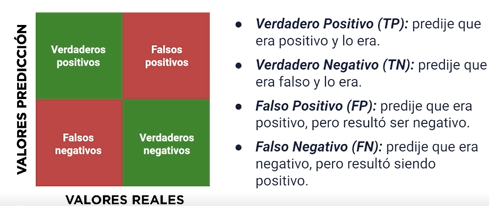

**Exactitud o accuracy**
% total de elementos que nuestro modelo ha sido capaz de clasificar correctamente.

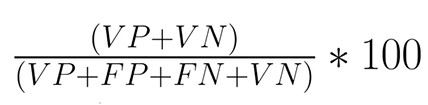

--> Un valor correcto de accuracy, depende del numero de datos que tengamos

**Precision**
Entre mayor dispersion, mayor precision, proporcion entre las prediccion correctas entre el total de las prediccion
--> PRediccion de casos efectivos detectado para medir la calidad del modelo.

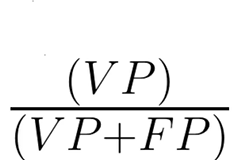

**Sensibilidad**
Recall, sensivity o tasa de casos positivos (Proporcion de casos positivos correctamente clasificados)

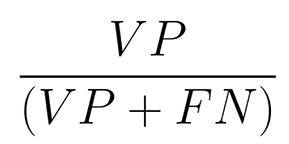

**Especificidad**
Tasa de los verdaderos negativos (Proporcion de casos negativos correctamente clasificados)

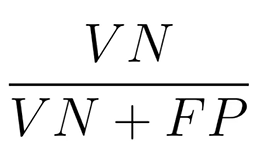


**F1-score** 
(De las mas usadas en ML)
Resume la precision y la sensibilidad en una sola metrica 


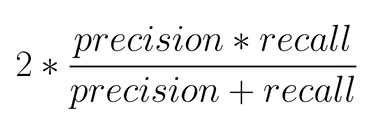

## Evaluación de modelo de clasificación con árbol de decisión

In [ ]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)

#Calculo el accuracy en Test
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print('El accuracy en train es:', train_accuracy_tree)
print('El accuracy en test es:', test_accuracy_tree)

El accuracy en train es: 0.7733664185277088
El accuracy en test es: 0.7591522157996147


C:\Users\AlexisBenitez\AppData\Local\Temp\ipykernel_21888\137597795.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columns, y=importances, hue=None , palette = "bright", saturation = 2.0, )


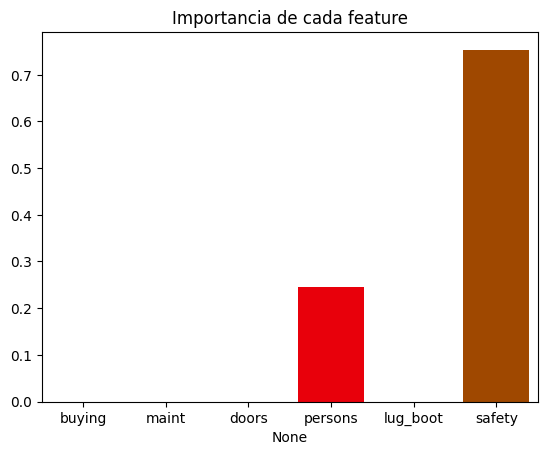

In [36]:
# Verificamos el feature importances
import seaborn as sns

importances =  tree.feature_importances_
columns = X.columns
sns.barplot(x=columns, y=importances, hue=None , palette = "bright", saturation = 2.0, )
#sns.barplot(x=columns, y=importances, palette = "bright",saturation = 2.0, edgecolor = "black", lidewidth = 2
plt.title("Importancia de cada feature")
plt.show()

In [37]:
# implementar el F1-score lo pueden hacer así:
from sklearn.metrics import f1_score

train_f1_tree = f1_score(y_train, y_train_pred_tree, average='micro')
test_f1_tree = f1_score(y_test, y_test_pred_tree, average='micro')

print("El f1 score en train es: ", train_f1_tree)
print("El f1 score en test es: ", test_f1_tree)

El f1 score en train es:  0.7444168734491315
El f1 score en test es:  0.7360308285163777


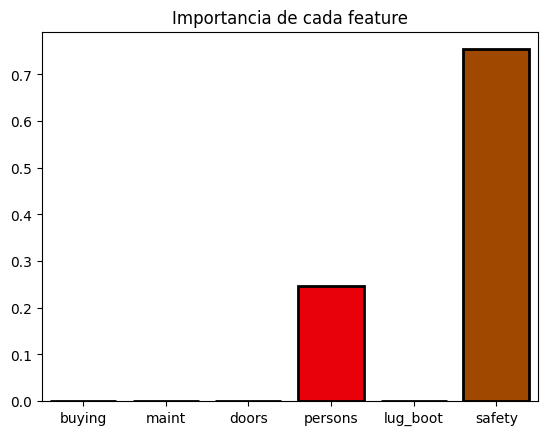

In [ ]:
# Variacion de codigo anterior
importances = tree.feature_importances_
columns = X.columns
data = pd.DataFrame([importances], columns=columns)
sns.barplot(data,
            palette = 'bright',
            saturation = 2.0,
            edgecolor = 'black',
            linewidth = 2)
plt.title('Importancia de cada feature')
plt.show()

## Entrenamiento de modelo de clasificación con random forest

In [ ]:
#Importar random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10, random_state =0)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [ ]:
#Calculo de las predicciones en Train y Test
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

## Evaluación de modelo de clasificación con random forest

In [ ]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy_rf =accuracy_score(y_train, y_train_pred_rf)

#Calculo el accuracy en Test
test_accuracy_rf =accuracy_score(y_test, y_test_pred_rf)

print('El accuracy en train es:', train_accuracy_rf)
print('El accuracy en test es:', test_accuracy_rf)

#Importante: podriamos reducir el numero de estimadores para disminuir el sobreajuste del modelo.

El accuracy en train es: 0.9942100909842845
El accuracy en test es: 0.8863198458574181


In [ ]:
# Visualizacion de las feature importantes
features_scores = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending=False)
features_scores

safety      0.254441
buying      0.226386
persons     0.212589
maint       0.140068
lug_boot    0.090112
doors       0.076404
dtype: float64

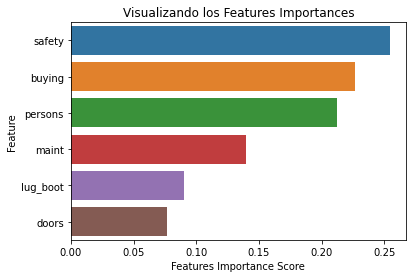

In [ ]:
#Grafico de barras
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=features_scores , y = features_scores.index)
plt.xlabel('Features Importance Score')
plt.ylabel('Feature')
plt.title("Visualizando los Features Importances")
plt.show()

In [ ]:
# Matriz de confusion del RF
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_test_pred_rf)

print('Matriz de Confusion\n\n', cm)

Matriz de Confusion

 [[ 94   4  19   1]
 [ 11   7   0   1]
 [ 10   0 348   0]
 [ 12   1   0  11]]


In [ ]:
#RF
from sklearn.metrics import classification_report

print(classification_report(y_test,y_test_pred_rf))

              precision    recall  f1-score   support

         acc       0.74      0.80      0.77       118
        good       0.58      0.37      0.45        19
       unacc       0.95      0.97      0.96       358
       vgood       0.85      0.46      0.59        24

    accuracy                           0.89       519
   macro avg       0.78      0.65      0.69       519
weighted avg       0.88      0.89      0.88       519

